# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.multioutput import MultiOutputClassifier

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.dummy import DummyClassifier

# Custom functions

In [4]:
def accuracy_performance(model, X, y):
    accuracy = round(model.score(X,y),3)
    return pd.DataFrame({'model':[str(model.estimator)], 'accuracy':[accuracy]})

In [5]:
def classification_analysis(df):
    df['model'] = df['model'].apply(lambda x: x.split('(')[0])
    
    fig = plt.figure(figsize=(11, 5))
    sns.barplot(x='model', y='accuracy', data=df)
    plt.ylim(0, 1)
    plt.xlabel('')
    plt.ylabel('accuracy', fontsize=14)
    plt.xticks(rotation=60, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', linewidth=0.8)

    plt.show()
    return df

In [6]:
def classificator_performance(model, X_test, y_test, target_names):
    y_pred = model.predict(X_test)
    return print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))  

In [7]:
def cross_validation(model, X, y, cv):
    r = cross_validate(model, X, y, cv=cv, n_jobs=-1, scoring=('accuracy'), return_train_score=True)
    r2_test_mean = round(r['test_score'].mean(),3)
    r2_train_mean = round(r['train_score'].mean(),3)
    r2_test_min = round(r['test_score'].min(),3)
    r2_train_min = round(r['train_score'].min(),3)
    r2_test_max = round(r['test_score'].max(),3)
    r2_train_max = round(r['train_score'].max(),3)    
    data = pd.DataFrame(r)
    data = data[['test_score', 'train_score']]
    
    sns.barplot(data=data)
    plt.grid(axis='y', linestyle='--', linewidth=0.8)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylabel('accuracy')
   
    print('test accuracy score: worst={0}, best={1}, avarage={2}'.format(r2_test_min,r2_test_max,r2_test_mean))
    print('train accuracy score: worst={0}, best={1}, avarage={2}'.format(r2_train_min,r2_train_max,r2_train_mean))
   
    return plt.show()

# Loading data

In [8]:
with open('reuters_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [9]:
X, y = data

In [10]:
with open('reuters_df_processed.pkl', 'rb') as f:
    data_frame = pickle.load(f)

In [11]:
df = data_frame

In [12]:
labels = ['label1', 'label2', 'label3', 'label4', 'label5', 'label6', 'label7']

In [13]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature241,feature242,feature243,label1,label2,label3,label4,label5,label6,label7
0,-1.798184,-1.008223,-1.054374,-0.963048,1.157219,1.231856,-0.431932,-0.501863,-0.496616,-0.607625,...,-0.203617,-0.18575,-0.214451,0,0,0,1,0,0,0
1,-0.052374,-1.008223,-1.054374,-0.963048,-0.580782,-0.520428,-0.431932,-0.501863,-0.496616,-0.117209,...,-0.203617,-0.18575,-0.214451,0,0,0,1,0,0,1
2,-0.052374,-1.008223,-1.054374,-0.963048,-0.580782,-0.520428,-0.431932,-0.501863,-0.496616,-0.607625,...,-0.203617,-0.18575,4.207223,0,1,0,0,0,0,0
3,-0.052374,-1.008223,0.632624,-0.963048,-0.580782,-0.520428,-0.431932,-0.501863,-0.496616,-0.607625,...,-0.203617,-0.18575,-0.214451,0,0,1,0,0,0,0
4,-0.052374,-1.008223,0.632624,-0.963048,-0.580782,-0.520428,2.405727,2.599888,0.269471,-0.607625,...,-0.203617,-0.18575,-0.214451,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.052374,0.964816,-1.054374,-0.963048,-0.580782,-0.520428,-0.026552,0.118487,-0.496616,-0.607625,...,-0.203617,-0.18575,-0.214451,0,0,0,0,1,0,0
1996,-0.052374,-1.008223,-1.054374,-0.963048,-0.580782,-0.520428,-0.026552,3.220239,0.652515,-0.117209,...,-0.203617,-0.18575,-0.214451,0,1,0,0,0,0,0
1997,-0.052374,0.964816,0.632624,0.425630,1.736553,1.815950,-0.431932,-0.501863,1.035559,1.354037,...,-0.203617,-0.18575,-0.214451,1,0,0,0,0,0,0
1998,-0.052374,-1.008223,0.632624,-0.963048,-0.580782,-0.520428,-0.431932,-0.501863,-0.496616,-0.607625,...,-0.203617,-0.18575,-0.214451,0,0,0,1,0,0,0


In [14]:
with open('reuters_labels_classes.pkl', 'rb') as f:
    target_classes = pickle.load(f)

# Setup classification models

In [15]:
model_LG = MultiOutputClassifier(LogisticRegression())
model_LG.get_params()

{'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'n_jobs': None}

In [16]:
model_SVC = MultiOutputClassifier(SVC(probability=True))
model_SVC.get_params()

{'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': True,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(probability=True),
 'n_jobs': None}

In [17]:
model_KNC = MultiOutputClassifier(KNeighborsClassifier())
model_KNC.get_params()

{'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None}

In [18]:
model_GNB = MultiOutputClassifier(GaussianNB())
model_GNB.get_params()

{'estimator__priors': None,
 'estimator__var_smoothing': 1e-09,
 'estimator': GaussianNB(),
 'n_jobs': None}

In [19]:
model_DTC = MultiOutputClassifier(DecisionTreeClassifier())
model_DTC.get_params()

{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None}

In [20]:
model_MLPC = MultiOutputClassifier(MLPClassifier())
model_MLPC.get_params()

{'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 200,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'estimator': MLPClassifier(),
 'n_jobs': None}

In [21]:
model_RFC = MultiOutputClassifier(RandomForestClassifier())
model_RFC.get_params()

{'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': None}

In [22]:
model_ABC = MultiOutputClassifier(AdaBoostClassifier())
model_ABC.get_params()

{'estimator__algorithm': 'SAMME.R',
 'estimator__base_estimator': 'deprecated',
 'estimator__estimator': None,
 'estimator__learning_rate': 1.0,
 'estimator__n_estimators': 50,
 'estimator__random_state': None,
 'estimator': AdaBoostClassifier(),
 'n_jobs': None}

In [23]:
model_GBC = MultiOutputClassifier(GradientBoostingClassifier())
model_GBC.get_params()

{'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'log_loss',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': None,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingClassifier(),
 'n_jobs': None}

In [24]:
model_DC= MultiOutputClassifier(DummyClassifier(strategy='stratified'))
model_DC.get_params()

{'estimator__constant': None,
 'estimator__random_state': None,
 'estimator__strategy': 'stratified',
 'estimator': DummyClassifier(strategy='stratified'),
 'n_jobs': None}

# Training models

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [26]:
model_LG.fit(X_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MultiOutputClassifier(estimator=LogisticRegression())

In [27]:
model_SVC.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC(probability=True))

In [28]:
model_KNC.fit(X_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier())

In [29]:
model_GNB.fit(X_train, y_train)

MultiOutputClassifier(estimator=GaussianNB())

In [30]:
model_DTC.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [31]:
model_MLPC.fit(X_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MultiOutputClassifier(estimator=MLPClassifier())

In [32]:
model_RFC.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [33]:
model_ABC.fit(X_train, y_train)

MultiOutputClassifier(estimator=AdaBoostClassifier())

In [34]:
model_GBC.fit(X_train, y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier())

In [35]:
model_DC.fit(X_train, y_train)

MultiOutputClassifier(estimator=DummyClassifier(strategy='stratified'))

# Accuracy score for Train and Test dataset

In [36]:
model_LG_train = accuracy_performance(model_LG, X_train, y_train)
model_LG_test = accuracy_performance(model_LG, X_test, y_test)

In [37]:
model_LG_train.insert(1, 'data', 'train')
model_LG_test.insert(1, 'data', 'test')
results = pd.concat([model_LG_train, model_LG_test], ignore_index=True)

In [38]:
model_SVC_train = accuracy_performance(model_SVC, X_train, y_train)
model_SVC_test = accuracy_performance(model_SVC, X_test, y_test)

In [39]:
model_SVC_train.insert(1, 'data', 'train')
model_SVC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_SVC_train, model_SVC_test], ignore_index=True)

In [40]:
model_KNC_train = accuracy_performance(model_KNC, X_train, y_train)
model_KNC_test = accuracy_performance(model_KNC, X_test, y_test)

In [41]:
model_KNC_train.insert(1, 'data', 'train')
model_KNC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_KNC_train, model_KNC_test], ignore_index=True)

In [42]:
model_GNB_train = accuracy_performance(model_GNB, X_train, y_train)
model_GNB_test = accuracy_performance(model_GNB, X_test, y_test)

In [43]:
model_GNB_train.insert(1, 'data', 'train')
model_GNB_test.insert(1, 'data', 'test')
results = pd.concat([results, model_GNB_train, model_GNB_test], ignore_index=True)

In [44]:
model_DTC_train = accuracy_performance(model_DTC, X_train, y_train)
model_DTC_test = accuracy_performance(model_DTC, X_test, y_test)

In [45]:
model_DTC_train.insert(1, 'data', 'train')
model_DTC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_DTC_train, model_DTC_test], ignore_index=True)

In [46]:
model_MLPC_train = accuracy_performance(model_MLPC, X_train, y_train)
model_MLPC_test = accuracy_performance(model_MLPC, X_test, y_test)

In [47]:
model_MLPC_train.insert(1, 'data', 'train')
model_MLPC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_MLPC_train, model_MLPC_test], ignore_index=True)

In [48]:
model_RFC_train = accuracy_performance(model_RFC, X_train, y_train)
model_RFC_test = accuracy_performance(model_RFC, X_test, y_test)

In [49]:
model_RFC_train.insert(1, 'data', 'train')
model_RFC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_RFC_train, model_RFC_test], ignore_index=True)

In [50]:
model_GBC_train = accuracy_performance(model_GBC, X_train, y_train)
model_GBC_test = accuracy_performance(model_GBC, X_test, y_test)

In [51]:
model_GBC_train.insert(1, 'data', 'train')
model_GBC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_GBC_train, model_GBC_test], ignore_index=True)

In [52]:
model_ABC_train = accuracy_performance(model_ABC, X_train, y_train)
model_ABC_test = accuracy_performance(model_ABC, X_test, y_test)

In [53]:
model_ABC_train.insert(1, 'data', 'train')
model_ABC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_ABC_train, model_ABC_test], ignore_index=True)

In [54]:
model_DC_train = accuracy_performance(model_DC, X_train, y_train)
model_DC_test = accuracy_performance(model_DC, X_test, y_test)

In [55]:
model_DC_train.insert(1, 'data', 'train')
model_DC_test.insert(1, 'data', 'test')
results = pd.concat([results, model_DC_train, model_DC_test], ignore_index=True)

In [56]:
results

,model,data,accuracy
0,LogisticRegression(),train,0.920
1,LogisticRegression(),test,0.602
2,SVC(probability=True),train,0.793
3,SVC(probability=True),test,0.552
4,KNeighborsClassifier(),train,0.645
5,KNeighborsClassifier(),test,0.605
6,GaussianNB(),train,0.281
7,GaussianNB(),test,0.235
8,DecisionTreeClassifier(),train,0.994
9,DecisionTreeClassifier(),test,0.548


# Accuracy rank for classification models test

In [57]:
df_results = results[(results['data'] != 'train')]
df_results = df_results.sort_values(by='accuracy', ascending=False)
df_results = df_results.reset_index(drop=True)
df_results.index = df_results.index + 1

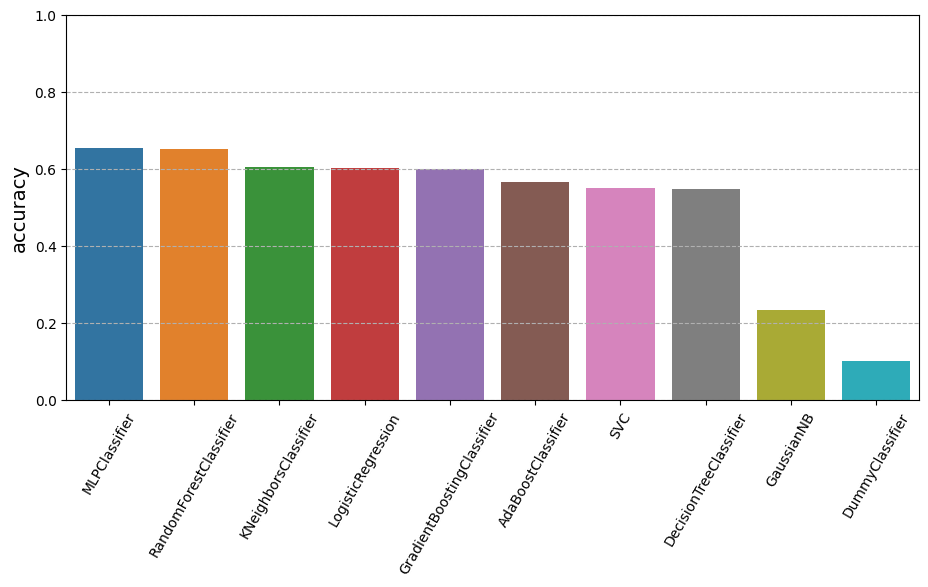

,model,data,accuracy
1,MLPClassifier,test,0.655
2,RandomForestClassifier,test,0.652
3,KNeighborsClassifier,test,0.605
4,LogisticRegression,test,0.602
5,GradientBoostingClassifier,test,0.600
6,AdaBoostClassifier,test,0.567
7,SVC,test,0.552
8,DecisionTreeClassifier,test,0.548
9,GaussianNB,test,0.235
10,DummyClassifier,test,0.102


In [58]:
classification_analysis(df_results)

# Pecision and Recall scores analysis

In [59]:
target_classes.values()

dict_values([False, True])

In [60]:
classificator_performance(model_LG, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       0.99      0.97      0.98       570
      label2       0.97      0.92      0.95       331
      label3       0.95      0.93      0.94       225
      label4       1.00      0.96      0.98       102
      label5       1.00      0.88      0.94        91
      label6       1.00      0.95      0.97       111
      label7       0.96      0.92      0.94       193

   micro avg       0.98      0.94      0.96      1623
   macro avg       0.98      0.93      0.96      1623
weighted avg       0.98      0.94      0.96      1623
 samples avg       0.94      0.94      0.94      1623



In [61]:
classificator_performance(model_LG, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       0.87      0.87      0.87       261
      label2       0.68      0.75      0.71       151
      label3       0.59      0.65      0.62        74
      label4       0.41      0.37      0.39        51
      label5       0.33      0.30      0.31        37
      label6       0.40      0.44      0.42        43
      label7       0.68      0.60      0.64        68

   micro avg       0.69      0.70      0.69       685
   macro avg       0.57      0.57      0.57       685
weighted avg       0.68      0.70      0.69       685
 samples avg       0.68      0.72      0.69       685



In [62]:
classificator_performance(model_KNC, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       0.87      0.88      0.88       570
      label2       0.86      0.62      0.72       331
      label3       0.78      0.68      0.73       225
      label4       0.85      0.38      0.53       102
      label5       0.94      0.19      0.31        91
      label6       0.90      0.39      0.54       111
      label7       0.83      0.69      0.75       193

   micro avg       0.85      0.67      0.75      1623
   macro avg       0.86      0.55      0.64      1623
weighted avg       0.86      0.67      0.73      1623
 samples avg       0.70      0.69      0.69      1623



In [63]:
classificator_performance(model_KNC, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       0.84      0.87      0.86       261
      label2       0.81      0.52      0.63       151
      label3       0.63      0.58      0.61        74
      label4       0.70      0.31      0.43        51
      label5       0.60      0.16      0.26        37
      label6       0.53      0.19      0.28        43
      label7       0.75      0.62      0.68        68

   micro avg       0.78      0.61      0.69       685
   macro avg       0.70      0.46      0.53       685
weighted avg       0.76      0.61      0.66       685
 samples avg       0.65      0.64      0.64       685



In [64]:
classificator_performance(model_SVC, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       1.00      0.94      0.97       570
      label2       0.98      0.88      0.93       331
      label3       0.97      0.75      0.84       225
      label4       1.00      0.56      0.72       102
      label5       1.00      0.43      0.60        91
      label6       1.00      0.67      0.80       111
      label7       0.96      0.80      0.88       193

   micro avg       0.99      0.81      0.89      1623
   macro avg       0.99      0.72      0.82      1623
weighted avg       0.99      0.81      0.88      1623
 samples avg       0.82      0.82      0.81      1623



In [65]:
classificator_performance(model_SVC, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       1.00      0.78      0.87       261
      label2       0.91      0.60      0.72       151
      label3       0.96      0.36      0.53        74
      label4       1.00      0.14      0.24        51
      label5       0.00      0.00      0.00        37
      label6       1.00      0.07      0.13        43
      label7       1.00      0.47      0.64        68

   micro avg       0.97      0.53      0.68       685
   macro avg       0.84      0.35      0.45       685
weighted avg       0.92      0.53      0.64       685
 samples avg       0.57      0.56      0.56       685



In [66]:
classificator_performance(model_GNB, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       0.62      0.92      0.74       570
      label2       0.40      0.88      0.55       331
      label3       0.39      0.92      0.54       225
      label4       0.25      0.92      0.39       102
      label5       0.36      0.73      0.48        91
      label6       0.44      0.78      0.57       111
      label7       0.40      0.94      0.56       193

   micro avg       0.44      0.89      0.59      1623
   macro avg       0.41      0.87      0.55      1623
weighted avg       0.47      0.89      0.60      1623
 samples avg       0.54      0.90      0.64      1623



In [67]:
classificator_performance(model_GNB, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       0.65      0.89      0.75       261
      label2       0.38      0.77      0.51       151
      label3       0.29      0.85      0.44        74
      label4       0.19      0.61      0.29        51
      label5       0.22      0.51      0.31        37
      label6       0.31      0.56      0.40        43
      label7       0.31      0.88      0.45        68

   micro avg       0.39      0.80      0.52       685
   macro avg       0.33      0.73      0.45       685
weighted avg       0.44      0.80      0.55       685
 samples avg       0.48      0.81      0.56       685



In [68]:
classificator_performance(model_DTC, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       1.00      1.00      1.00       570
      label2       1.00      0.99      1.00       331
      label3       0.99      0.99      0.99       225
      label4       1.00      1.00      1.00       102
      label5       1.00      0.99      0.99        91
      label6       1.00      1.00      1.00       111
      label7       1.00      0.99      1.00       193

   micro avg       1.00      1.00      1.00      1623
   macro avg       1.00      1.00      1.00      1623
weighted avg       1.00      1.00      1.00      1623
 samples avg       1.00      1.00      1.00      1623



In [69]:
classificator_performance(model_DTC, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       0.86      0.88      0.87       261
      label2       0.68      0.66      0.67       151
      label3       0.62      0.64      0.63        74
      label4       0.40      0.39      0.40        51
      label5       0.19      0.22      0.20        37
      label6       0.41      0.49      0.45        43
      label7       0.52      0.56      0.54        68

   micro avg       0.66      0.68      0.67       685
   macro avg       0.53      0.55      0.54       685
weighted avg       0.66      0.68      0.67       685
 samples avg       0.64      0.69      0.65       685



In [70]:
classificator_performance(model_RFC, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       1.00      1.00      1.00       570
      label2       0.99      1.00      1.00       331
      label3       0.99      1.00      0.99       225
      label4       1.00      1.00      1.00       102
      label5       1.00      0.99      0.99        91
      label6       1.00      1.00      1.00       111
      label7       0.99      1.00      1.00       193

   micro avg       1.00      1.00      1.00      1623
   macro avg       1.00      1.00      1.00      1623
weighted avg       1.00      1.00      1.00      1623
 samples avg       1.00      1.00      1.00      1623



In [71]:
classificator_performance(model_RFC, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       0.97      0.90      0.93       261
      label2       0.91      0.70      0.79       151
      label3       0.93      0.55      0.69        74
      label4       0.60      0.12      0.20        51
      label5       0.86      0.16      0.27        37
      label6       0.73      0.19      0.30        43
      label7       0.98      0.59      0.73        68

   micro avg       0.94      0.64      0.76       685
   macro avg       0.85      0.46      0.56       685
weighted avg       0.90      0.64      0.73       685
 samples avg       0.68      0.67      0.68       685



In [72]:
classificator_performance(model_MLPC, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       1.00      1.00      1.00       570
      label2       1.00      0.99      1.00       331
      label3       0.99      1.00      0.99       225
      label4       1.00      0.99      1.00       102
      label5       1.00      0.99      0.99        91
      label6       1.00      0.98      0.99       111
      label7       1.00      0.99      1.00       193

   micro avg       1.00      0.99      1.00      1623
   macro avg       1.00      0.99      1.00      1623
weighted avg       1.00      0.99      1.00      1623
 samples avg       0.99      0.99      0.99      1623



In [73]:
classificator_performance(model_MLPC, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       0.91      0.90      0.91       261
      label2       0.75      0.78      0.76       151
      label3       0.71      0.72      0.71        74
      label4       0.54      0.41      0.47        51
      label5       0.45      0.27      0.34        37
      label6       0.53      0.44      0.48        43
      label7       0.75      0.63      0.69        68

   micro avg       0.77      0.73      0.75       685
   macro avg       0.66      0.59      0.62       685
weighted avg       0.76      0.73      0.74       685
 samples avg       0.74      0.75      0.74       685



In [74]:
classificator_performance(model_ABC, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       0.95      0.91      0.93       570
      label2       0.88      0.76      0.82       331
      label3       0.85      0.74      0.79       225
      label4       0.82      0.49      0.61       102
      label5       0.95      0.42      0.58        91
      label6       0.89      0.60      0.72       111
      label7       0.88      0.77      0.82       193

   micro avg       0.90      0.77      0.83      1623
   macro avg       0.89      0.67      0.75      1623
weighted avg       0.90      0.77      0.82      1623
 samples avg       0.77      0.78      0.77      1623



In [75]:
classificator_performance(model_ABC, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       0.90      0.89      0.90       261
      label2       0.76      0.62      0.69       151
      label3       0.59      0.50      0.54        74
      label4       0.44      0.14      0.21        51
      label5       0.15      0.05      0.08        37
      label6       0.38      0.23      0.29        43
      label7       0.75      0.53      0.62        68

   micro avg       0.77      0.61      0.68       685
   macro avg       0.57      0.42      0.47       685
weighted avg       0.72      0.61      0.65       685
 samples avg       0.64      0.63      0.63       685



In [76]:
classificator_performance(model_GBC, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       1.00      0.97      0.98       570
      label2       1.00      0.88      0.93       331
      label3       0.97      0.84      0.90       225
      label4       1.00      0.69      0.81       102
      label5       1.00      0.67      0.80        91
      label6       1.00      0.76      0.86       111
      label7       0.97      0.86      0.91       193

   micro avg       0.99      0.87      0.93      1623
   macro avg       0.99      0.81      0.89      1623
weighted avg       0.99      0.87      0.92      1623
 samples avg       0.88      0.87      0.87      1623



In [77]:
classificator_performance(model_GBC, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       0.94      0.90      0.92       261
      label2       0.87      0.60      0.71       151
      label3       0.76      0.50      0.60        74
      label4       0.71      0.20      0.31        51
      label5       0.50      0.11      0.18        37
      label6       0.50      0.14      0.22        43
      label7       0.82      0.54      0.65        68

   micro avg       0.87      0.61      0.72       685
   macro avg       0.73      0.43      0.51       685
weighted avg       0.82      0.61      0.68       685
 samples avg       0.65      0.64      0.64       685



In [78]:
classificator_performance(model_DC, X_train, y_train, labels)

              precision    recall  f1-score   support

      label1       0.42      0.42      0.42       570
      label2       0.22      0.23      0.23       331
      label3       0.15      0.15      0.15       225
      label4       0.02      0.02      0.02       102
      label5       0.08      0.07      0.07        91
      label6       0.07      0.06      0.07       111
      label7       0.15      0.15      0.15       193

   micro avg       0.25      0.24      0.24      1623
   macro avg       0.16      0.16      0.16      1623
weighted avg       0.24      0.24      0.24      1623
 samples avg       0.19      0.26      0.20      1623



In [79]:
classificator_performance(model_DC, X_test, y_test, labels)

              precision    recall  f1-score   support

      label1       0.42      0.39      0.40       261
      label2       0.25      0.22      0.23       151
      label3       0.12      0.15      0.13        74
      label4       0.05      0.04      0.04        51
      label5       0.07      0.05      0.06        37
      label6       0.08      0.12      0.10        43
      label7       0.11      0.12      0.12        68

   micro avg       0.24      0.24      0.24       685
   macro avg       0.16      0.15      0.16       685
weighted avg       0.25      0.24      0.24       685
 samples avg       0.18      0.25      0.20       685



# Cross validation model analysis

test accuracy score: worst=0.25, best=0.833, avarage=0.568
train accuracy score: worst=0.971, best=0.976, avarage=0.973


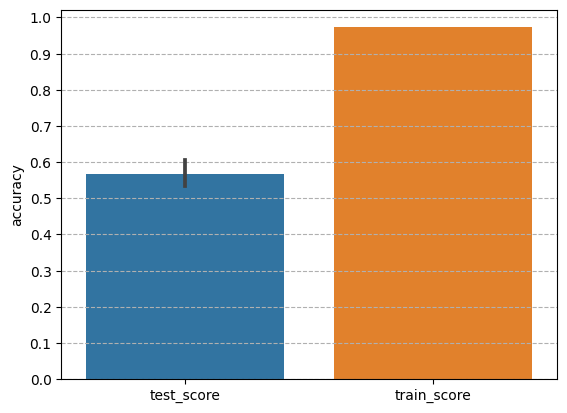

In [80]:
cross_validation(model_LG, X_test, y_test, cv=50)

test accuracy score: worst=0.333, best=0.833, avarage=0.583
train accuracy score: worst=0.995, best=0.998, avarage=0.997


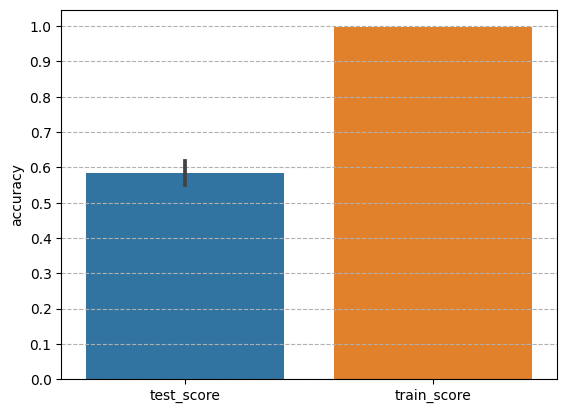

In [81]:
cross_validation(model_RFC, X_test, y_test, cv=50)